# Ex 1 Classes

1. Create 3 classes: Student, DataSheet and Course
2. A student has a data_sheet and a data_sheet has multiple courses in particular order
3. Each course has name, classroom, teacher, ETCS and optional grade if course is taken.
4. In Student create init() so that a Student can be initiated with name, gender, data_sheet and image_url
5. In DataSheet create a method to get_grades_as_list()
6. In student create a method: get_avg_grade()
9. Make a method on Student class that can show progression of the study in % (add up ECTS from all passed courses divided by total of 150 total points (equivalent to 5 semesters))

In [88]:
class Student():
    def __init__(self, name, gender, data_sheet, image_url):
        self.name = name
        self.gender = gender
        self.data_sheet = data_sheet
        self.image_url = image_url

    def get_avg_grade(self):
        return sum(self.data_sheet.get_grades_as_list()) / len(self.data_sheet.get_grades_as_list())

    def get_progression(self):
        etcs = 0
        for course in self.data_sheet.courses:
            if(course.grade > 0):
                etcs += course.ETCs
        return (150 / 100) * etcs

    def get_courses(self):
        return self.data_sheet.courses


class DataSheet():
    def __init__(self, courses):
        self.courses = courses

    def get_grades_as_list(self):
        l = []
        for course in self.courses:
            if(course.grade != None):
                l.append(course.grade)
        return l


class Course():
    def __init__(self, name, classroom, teacher, ETCs, grade=0):
        self.name = name
        self.classroom = classroom
        self.teacher = teacher
        self.ETCs = int(ETCs)
        self.grade = grade


7. Create a function that can generate n number of students with random: name, gender, courses (from a fixed list of course names), grades, img_url

    a. Let the function write the result to a csv file with format stud_name, course_name, teacher, ects, classroom, grade, img_url


In [99]:
import random as rnd
import csv

def create_students(number_of_students):
    first_names = ["Martin", "Andreas", "Emil", "Asger", "William"]
    last_names = ["Frederiksen", "Vikke", "Svensmark", "Sørensen", "Huusfeldt"]
    grades = [-3, 0, 2, 4, 7, 10, 12]
    courses = ["Python", "Security", "AP"]
    teachers = ["Thomas", "Lars", "Tobias"]

    students = []

    for i in range(number_of_students):
        stud_courses = []
        for index, course in enumerate(courses):
            stud_courses.append(Course(course, "CL-103", teachers[index], 15, rnd.choice(grades)))

        students.append(Student("{} {}".format(
                first_names[rnd.randint(0, len(first_names)-1)], 
                last_names[rnd.randint(0, len(last_names)-1)]), 
                rnd.choice(["male", "female"]), 
                DataSheet(stud_courses), 
                "URL"))

    students[0].data_sheet.courses = students[0].data_sheet.courses[:1]

    with open('./students.csv', 'w') as File:
        writer = csv.writer(File, quoting=csv.QUOTE_NONNUMERIC)

        csv_columns = ['stud_name', 'gender', 'course_name','teacher', 'ects', 'classroom', 'grade', 'img_url']

        writer.writerow(csv_columns)
        for student in students:
            for course in student.data_sheet.courses:
                writer.writerow([
                    student.name,
                    student.gender,
                    course.name,
                    course.teacher,
                    course.ETCs,
                    course.classroom,
                    course.grade,
                    student.image_url
                ])
create_students(5)

8. Read student data into a list of Students from a csv file:

    a. loop through the list and print each student with name, img_url and avg_grade.

    b. sort the list by avg_grade

In [100]:
students = {}

with open('./students.csv', 'r') as File:
    reader = csv.reader(File)
    for row in list(reader)[1:]:
        if row[0] not in students:
            students[row[0]] = Student(row[0], row[1], DataSheet([Course(row[2], row[5], row[3], row[4], int(row[6]))]), row[7])
        else:
            students[row[0]].data_sheet.courses.append(Course(row[2], row[5], row[3], int(row[4]), int(row[6])))

for student_name in students:
    student = students[student_name]
    print('{}, {}, {}'.format(student.name, student.image_url, student.get_avg_grade()))

Andreas Frederiksen, URL, 12.0
Andreas Sørensen, URL, 2.6666666666666665
Andreas Huusfeldt, URL, 1.3333333333333333
Andreas Svensmark, URL, 8.0
Andreas Vikke, URL, 10.666666666666666


c. create a bar chart with student_name on x and avg_grade on y-axis

Text(0, 0.5, 'Avg Grade')

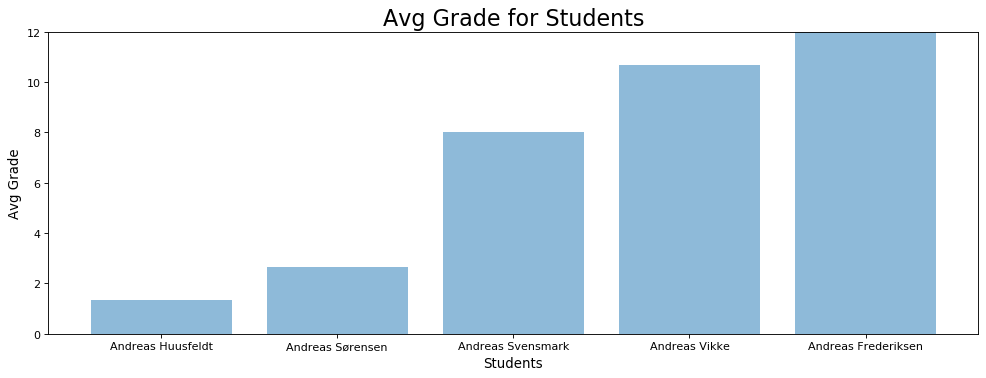

In [101]:
import matplotlib.pyplot as plt

avgstudent = {}
for student in students:
    avgstudent[student] = students[student].get_avg_grade()

avgstudent = {k: v for k, v in sorted(avgstudent.items(), key=lambda item: item[1])}

y_bar = avgstudent.keys()
x_bar = avgstudent.values()

plt.figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')

plt.bar(y_bar, x_bar, align='center', alpha=0.5)

axes = plt.gca()
axes.set_ylim([0, 12])


plt.title('Avg Grade for Students', fontsize=20)

plt.xlabel("Students", fontsize=12)
plt.ylabel("Avg Grade", fontsize=12)

10. Show a line graph of distribution of study progression on x-axis and number of students in each category on y-axis. (e.g. make 10 categories from 0-100%)

Text(0, 0.5, 'Progression')

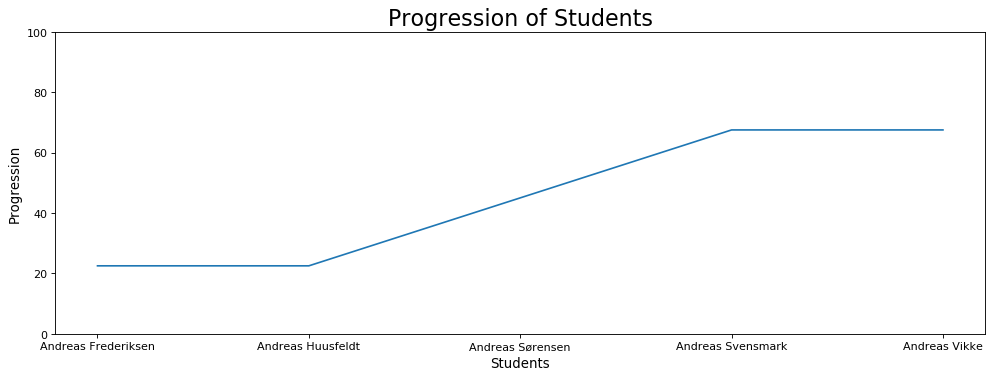

In [102]:
progress = {}
for student in students:
    progress[student] = students[student].get_progression()

progress = {k: v for k, v in sorted(progress.items(), key=lambda item: item[1])}

progressions = list(progress.values())
names = list(progress.keys())

plt.figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')

plt.plot(names, progressions)

axes = plt.gca()
axes.set_ylim([0, 100])

plt.title('Progression of Students', fontsize=20)

plt.xlabel("Students", fontsize=12)
plt.ylabel("Progression", fontsize=12)

# Ex 2 Exceptions

1. Create a function that can take a list of students and return the 3 students closest to completing their study.
2. If list is shorter than 3 raise your own custom exception (NotEnoughStudentsException)
3. Create another function that can create a csv file with 3 students closest to completion

 A. If an exception is raised write an appropriate message to the file


In [103]:
class NotEnoughStudentsException(ValueError):
    def __init__(self, *args, **kwargs):
        ValueError.__init__(self, *args, **kwargs)

def get_3_students_closest_to_finish():
    students_ctf = sorted(progress, key=progress.get, reverse=True)[:3]
    if(len(students_ctf) < 3):
        raise NotEnoughStudentsException('Not Enough Students')
    else:
        return students_ctf
        

get_3_students_closest_to_finish()

['Andreas Svensmark', 'Andreas Vikke', 'Andreas Sørensen']

# Ex 3 Plotting

1. Create a function that can take a list of students and show a pie chart of how students are distributed in ECTS percentage categories (10%, 20%, ...)
2. create a function that can take a list of students and show how many students have taken each course (bar chart)

    a. create a method on student that can return a list of courses
3. make the figure show males and females in different colors for each course (display 2 datasets in same figure)


([<matplotlib.patches.Wedge at 0x7f66cb54f610>,
 [Text(0.33991867422268784, 1.0461621742897658, '(30%)\nAndreas Frederiksen,\nAndreas Huusfeldt'),
  Text(-1.0999999999999988, -5.149471622296949e-08, '(50%)\nAndreas Sørensen'),
  Text(0.33991877217145827, -1.046162142464278, '(70%)\nAndreas Svensmark,\nAndreas Vikke')],
 [Text(0.1854101859396479, 0.5706339132489631, '40.0%'),
  Text(-0.5999999999999993, -2.808802703071063e-08, '20.0%'),
  Text(0.18541023936624995, -0.5706338958896061, '40.0%')])

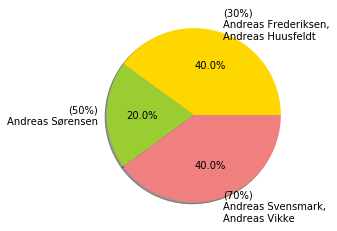

In [104]:
import math

procent = {}

for prog in progress:
    t = int(math.ceil(progress[prog] / 10.0)) * 10
    procent[t] = procent.get(t, 0) + 1

sizes = []
labels = []
for t in procent:
    sizes.append((procent[t] / len(progress)) * 100)
    label = []
    for prog in progress:
        if t == int(math.ceil(progress[prog] / 10.0)) * 10:
            label.append(prog)
    labels.append('({}%)\n'.format(t) + ',\n'.join(label))


colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']

# Plot
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)

<BarContainer object of 3 artists>

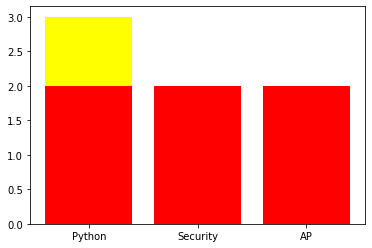

In [122]:
maleCourses = {}
femaleCourses = {}
for student in students:
    for course in students[student].get_courses():
        if(students[student].gender == 'male'):
            maleCourses[course.name] = maleCourses.get(course.name, 0) + 1
        else:
            femaleCourses[course.name] = femaleCourses.get(course.name, 0) + 1

y_bar = maleCourses.keys()
x_bar1 = maleCourses.values()
x_bar2 = femaleCourses.values()

plt.bar(y_bar, x_bar1 if len(x_bar1) > len(x_bar2) else x_bar2, align='center', color='yellow')
plt.bar(y_bar, x_bar2 if len(x_bar2) < len(x_bar2) else x_bar1, align='center', color='red')
